In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from analysis import *

In [50]:
pools = pd.read_csv('./../data/pools.csv')
pools['date'] = pd.to_datetime(pools['date'])
#pools = pools.loc[pools['date'] == pd.to_datetime('2021-07-11')]
pools = pools.loc[~pools['win'].isnull()]
pools.reset_index(inplace=True, drop=True)
pools['total'] = pools['win'] + pools['place'] + pools['show']
bets = ['win', 'place', 'show']
for bet in bets:
    pools[bet + 'Perc'] = pools[bet] / pools['total'] * 100

Win mean: 66
Place mean: 22
Show mean: 12


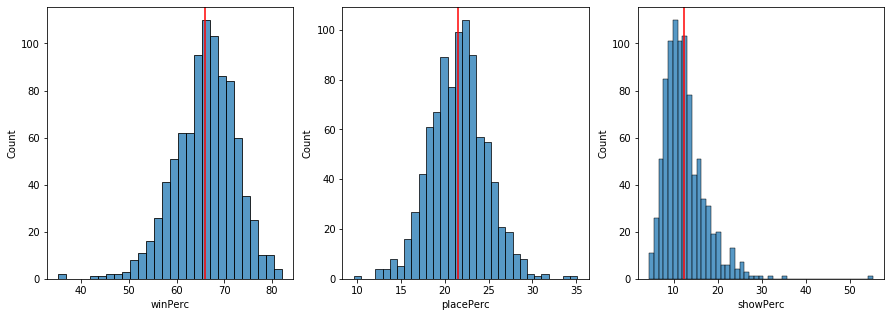

In [51]:
_, axs = plt.subplots(1,3, figsize=(15,5))

sns.histplot(pools['winPerc'], ax=axs[0])
axs[0].axvline(pools['winPerc'].mean(), color='red')
print('Win mean:', round(pools['winPerc'].mean()))

sns.histplot(pools['placePerc'], ax=axs[1])
axs[1].axvline(pools['placePerc'].mean(), color='red')
print('Place mean:', round(pools['placePerc'].mean()))

sns.histplot(pools['showPerc'], ax=axs[2])
axs[2].axvline(pools['showPerc'].mean(), color='red')
print('Show mean:', round(pools['showPerc'].mean()))

In [52]:
winMod = smf.ols('winPerc ~ total + np.power(total, 2)', data=pools).fit()
winMod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                winPerc   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     71.83
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.10e-29
Time:                        09:12:48   Log-Likelihood:                -2906.5
No. Observations:                 910   AIC:                             5819.
Df Residuals:                     907   BIC:                             5833.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             64.0182      0.258    248.421      0.000      63.512      64.524
total                  0.0001   9.93e-06     11.726      0.000     9.7e-05       0.000
np.power(total, 2) -3.125e-10   3.71e-11     -8.418      0.000   -3.85e-10    -2.4e-10
==============================================================================
Omnibus:                       82.682   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.019
Skew:                          -0.569   Prob(JB):                     1.47e-36
Kurtosis:                       4.748   Cond. No.                     1.28e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

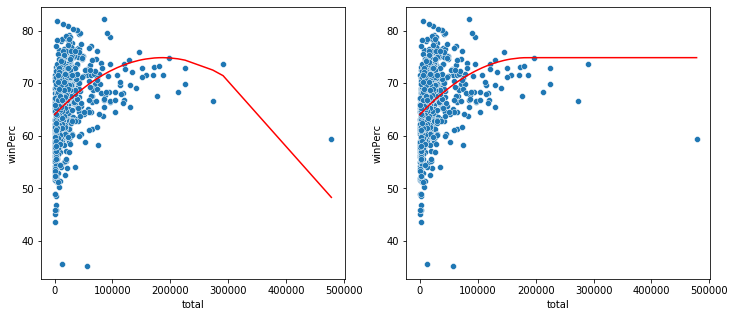

In [53]:
_, axs = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(x=pools['total'], y=pools['winPerc'], ax=axs[0])
sns.lineplot(x=pools['total'], y=winMod.fittedvalues, color='red', ax=axs[0])

poolsMaxVal = pools.loc[list(winMod.fittedvalues).index(max(winMod.fittedvalues)), 'total']
winFlattened = np.array(winMod.fittedvalues)
winFlattened[pools['total'] > poolsMaxVal] = max(winMod.fittedvalues)
sns.scatterplot(x=pools['total'], y=pools['winPerc'], ax=axs[1])
sns.lineplot(x=pools['total'], y=winFlattened, color='red', ax=axs[1])

In [54]:
placeMod = smf.ols('placePerc ~ total + np.power(total,2)', data=pools).fit()
placeMod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              placePerc   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     62.41
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           4.02e-26
Time:                        09:12:52   Log-Likelihood:                -2288.2
No. Observations:                 910   AIC:                             4582.
Df Residuals:                     907   BIC:                             4597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             22.4555      0.131    171.910      0.000      22.199      22.712
total              -5.183e-05   5.03e-06    -10.297      0.000   -6.17e-05    -4.2e-05
np.power(total, 2)  1.168e-10   1.88e-11      6.205      0.000    7.98e-11    1.54e-10
==============================================================================
Omnibus:                       14.472   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.114
Skew:                          -0.013   Prob(JB):                     3.52e-06
Kurtosis:                       3.813   Cond. No.                     1.28e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

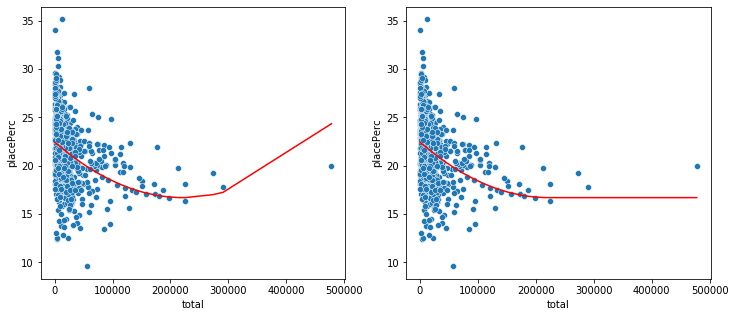

In [55]:
_, axs = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(x=pools['total'], y=pools['placePerc'], ax=axs[0])
sns.lineplot(x=pools['total'], y=placeMod.fittedvalues, color='red', ax=axs[0])

poolsMinVal = pools.loc[list(placeMod.fittedvalues).index(min(placeMod.fittedvalues)), 'total']
placeFlattened = np.array(placeMod.fittedvalues)
placeFlattened[pools['total'] > poolsMinVal] = min(placeMod.fittedvalues)
sns.scatterplot(x=pools['total'], y=pools['placePerc'], ax=axs[1])
sns.lineplot(x=pools['total'], y=placeFlattened, color='red', ax=axs[1])

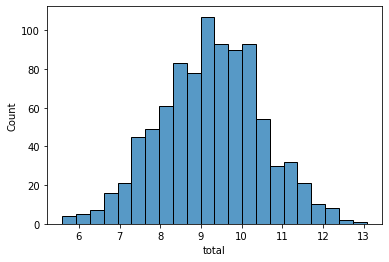

In [56]:
sns.histplot(np.log(pools.total))

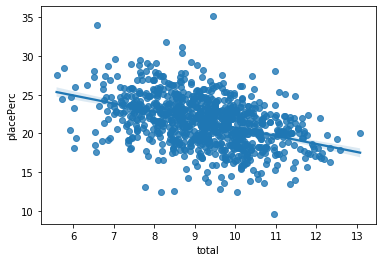

In [57]:
sns.regplot(x=np.log(pools.total), y=pools.placePerc)

In [58]:
showMod = smf.ols('showPerc ~ total + np.power(total,2)', data=pools).fit()
showMod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               showPerc   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     37.83
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.66e-16
Time:                        09:13:00   Log-Likelihood:                -2643.2
No. Observations:                 910   AIC:                             5292.
Df Residuals:                     907   BIC:                             5307.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.5262      0.193     70.104      0.000      13.148      13.905
total              -6.461e-05   7.44e-06     -8.690      0.000   -7.92e-05      -5e-05
np.power(total, 2)  1.958e-10   2.78e-11      7.043      0.000    1.41e-10     2.5e-10
==============================================================================
Omnibus:                      473.335   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6442.115
Skew:                           2.041   Prob(JB):                         0.00
Kurtosis:                      15.379   Cond. No.                     1.28e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

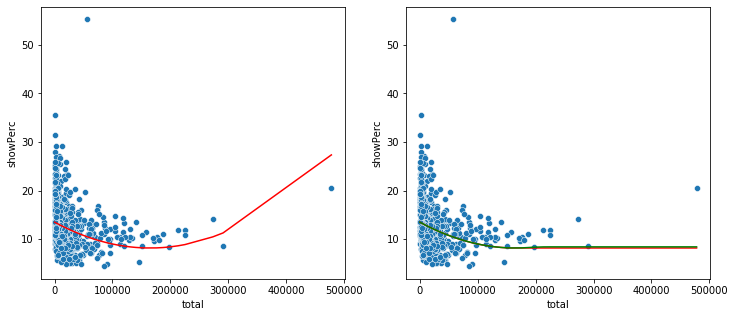

In [59]:
_, axs = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(x=pools['total'], y=pools['showPerc'], ax=axs[0])
sns.lineplot(x=pools['total'], y=showMod.fittedvalues, color='red', ax=axs[0])

poolsMinVal = pools.loc[list(showMod.fittedvalues).index(min(showMod.fittedvalues)), 'total']
showFlattened = np.array(showMod.fittedvalues)
showFlattened[pools['total'] > poolsMinVal] = min(showMod.fittedvalues)
sns.scatterplot(x=pools['total'], y=pools['showPerc'], ax=axs[1])
sns.lineplot(x=pools['total'], y=showFlattened, color='red', ax=axs[1])

sns.lineplot(x=pools['total'], y= 100 - (winFlattened + placeFlattened), color='green', ax=axs[1])

In [60]:
racePools = pools.iloc[:, :9].groupby(['date', 'track', 'race']).sum()
racePools['winPerc'] = racePools['win'] / racePools['total']
racePools['placePerc'] = racePools['place'] / racePools['total']
racePools['showPerc'] = racePools['show'] / racePools['total']

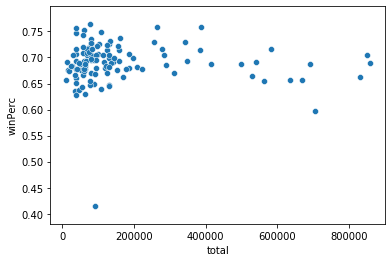

In [61]:
sns.scatterplot(x=racePools['total'], y=racePools['winPerc'])

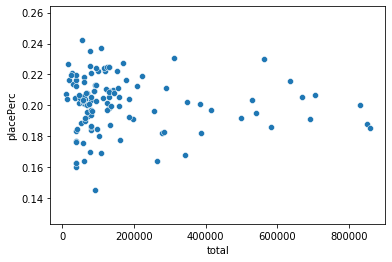

In [62]:
sns.scatterplot(x=racePools['total'], y=racePools['placePerc'])

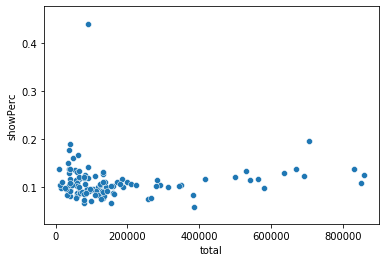

In [63]:
sns.scatterplot(x=racePools['total'], y=racePools['showPerc'])